In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator
import matplotlib.pyplot as plt

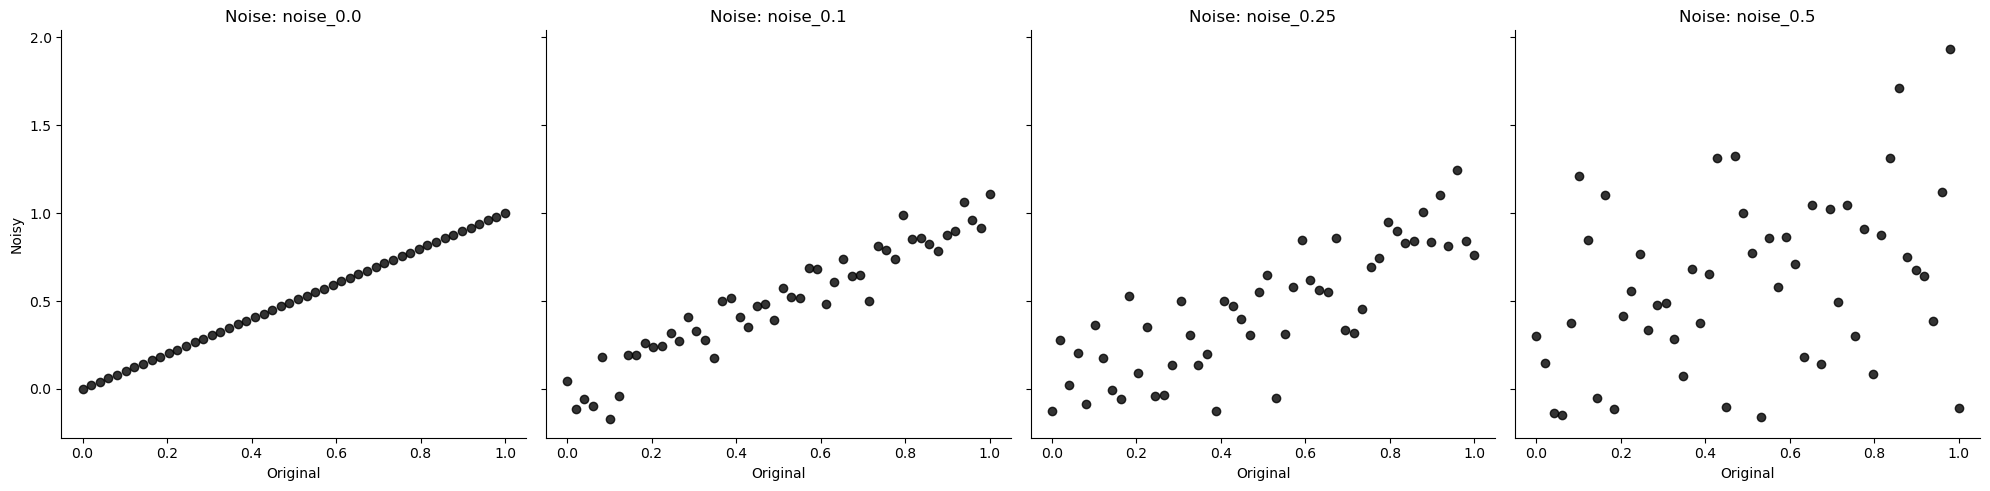

In [3]:
uniform_dataset = pd.DataFrame(np.linspace(0, 1, 50)).rename(columns={0: 'labels'})

NE = NoiseEstimator(uniform_dataset.labels, [0.0, 0.1, 0.25, 0.5], 0, 'gaussian')
NE.plot()
plt.show()

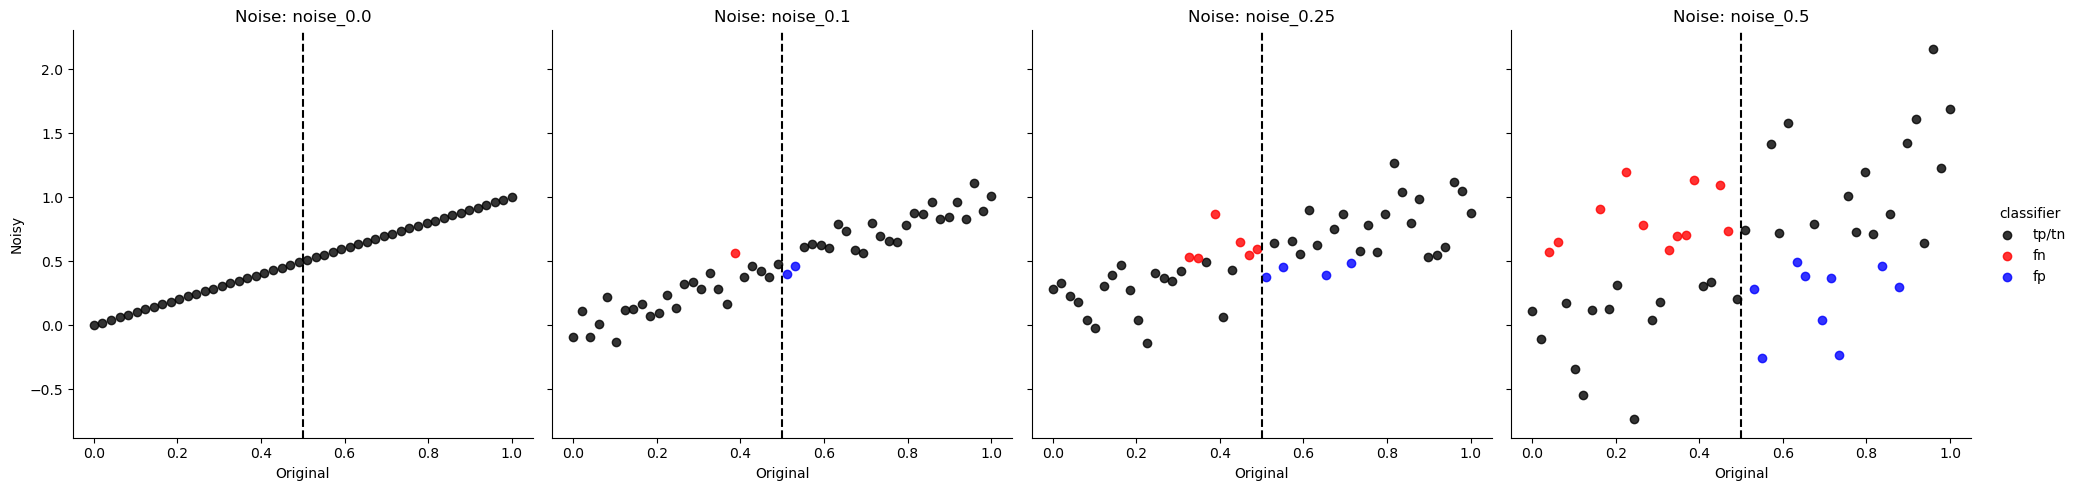

In [4]:
NE = NoiseEstimator(uniform_dataset.labels, [0.0, 0.1, 0.25, 0.5], 0, 'gaussian', classifier=True)
NE.plot()
plt.show()

In [5]:
NE.dataset_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [7]:
noise_df = NE.noise_estimates

noise_labels = NE.noisy_labels
noise_melt = noise_labels.melt(id_vars='original', var_name='noise', value_name='value')
# now change the value column to either 'tp/tn' or 'fp' or 'fn' depending on the original label
noise_melt['value'] = noise_melt.apply(lambda row: 'tp/tn' if row['original'] == row['value'] else 'fp' if row['original'] == 1 else 'fn', axis=1)
noise_melt

,original,noise,value
0,0,noise_0.0,tp/tn
1,0,noise_0.0,tp/tn
2,0,noise_0.0,tp/tn
3,0,noise_0.0,tp/tn
4,0,noise_0.0,tp/tn
...,...,...,...
195,1,noise_0.5,tp/tn
196,1,noise_0.5,tp/tn
197,1,noise_0.5,tp/tn
198,1,noise_0.5,tp/tn


In [8]:
df_melt = noise_df.melt(id_vars='original', var_name='noise', value_name='value')
# add column for classifier, with label 'tp/tn', 'fp', 'fn' depending on the dataframe noise_labels
# the noise_labels dataframe looks like the noise_df, but instead of the value, it has the binary labels.
# we now need to compare the 'original' and respective noise column in the noise_labels dataframe to get one of the three labels
df_melt['classifier'] = noise_melt['value']
df_melt

,original,noise,value,classifier
0,0.000000,noise_0.0,0.000000,tp/tn
1,0.020408,noise_0.0,0.020408,tp/tn
2,0.040816,noise_0.0,0.040816,tp/tn
3,0.061224,noise_0.0,0.061224,tp/tn
4,0.081633,noise_0.0,0.081633,tp/tn
...,...,...,...,...
195,0.918367,noise_0.5,1.611914,tp/tn
196,0.938776,noise_0.5,0.640615,tp/tn
197,0.959184,noise_0.5,2.157542,tp/tn
198,0.979592,noise_0.5,1.225016,tp/tn


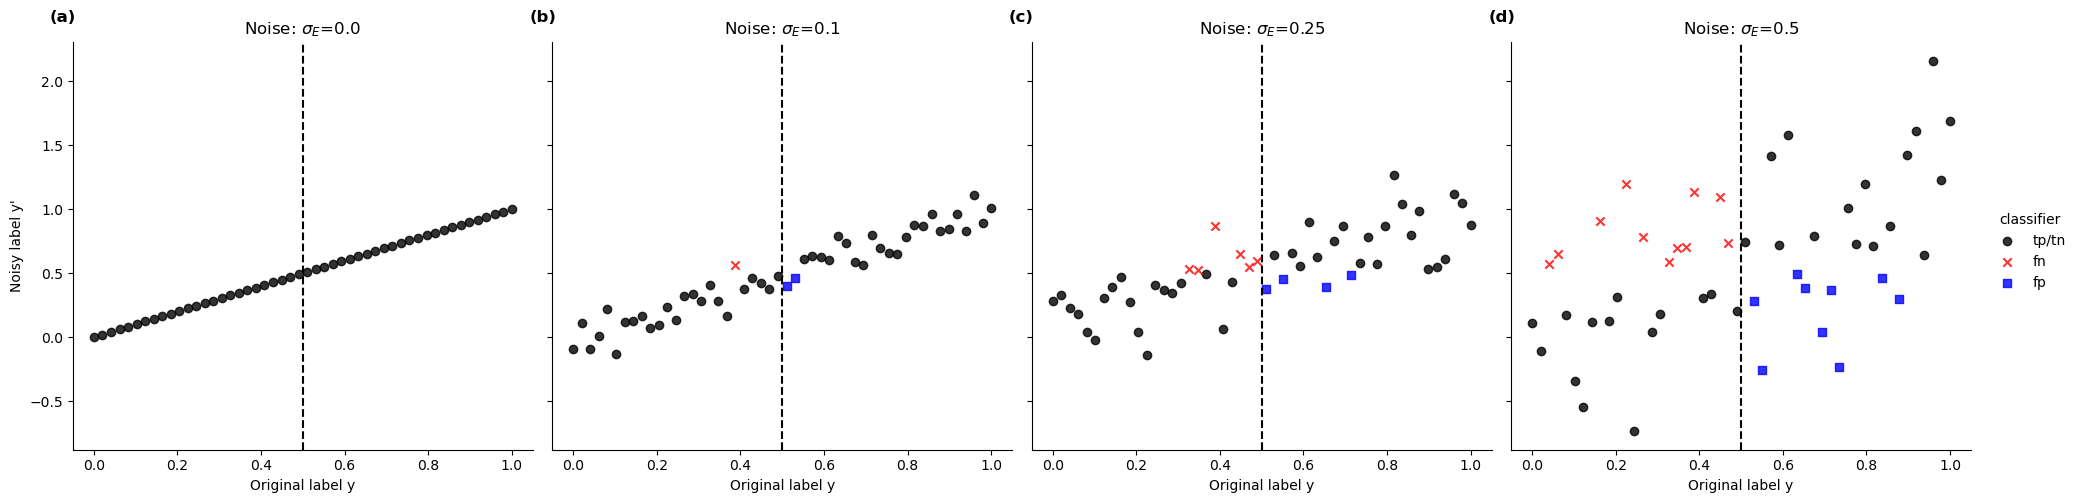

In [9]:
g = sns.lmplot(x='original', y='value', col='noise', hue='classifier', data=df_melt, aspect=1.0, fit_reg=False, palette=['black', 'red', 'blue'], markers=['o', 'x', 's'])
for i in range(len(noise_df.columns) - 1):
    g.axes[0, i].set_title(f'Noise: $\sigma_E$={noise_df.columns[i+1].split("_")[1]}')
    g.axes[0, i].set_xlabel('Original label y')
    g.axes[0, i].set_ylabel('Noisy label y\'')
    # add vertical line at 0.5
    g.axes[0, i].axvline(0.5, color='black', linestyle='--')
    g.axes[0,i].text(-0.05, 1.05, f'({chr(97 + i)})', transform=g.axes[0,i].transAxes, size=12, weight='bold')
plt.savefig('../reports/synthetic_dataset_example.svg')
